In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes

In [ ]:
diabetes=load_diabetes()

In [ ]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [ ]:
#train test split
import numpy as np
def train_test_split(x,y,train_size=0.8,random_state=None):
  N=len(x)
  train_size=int(train_size*N)
  RNG=np.random.default_rng(random_state)
  train_idx=RNG.choice(N,train_size,replace=False)
  test_idx=np.setdiff1d(np.arange(N),train_idx)
  return x[train_idx],x[test_idx],y[train_idx],y[test_idx]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(diabetes.data,diabetes.target,0.6,random_state=42)

In [ ]:
from scipy.spatial import KDTree
from scipy.stats import gmean

In [ ]:
class KNNRegressor:
  def __init__(self,n_neighbors=5):
    self.n_neighbors=n_neighbors

  def fit(self,x,y):
    self.y_train=y
    self.x_train_tree=KDTree(x)
    return self

  def predict(self,x_test):
    dist,ind=self.x_train_tree.query(x_test,k=self.n_neighbors)
    neighbour_values=self.y_train[ind]
    return np.mean(neighbour_values,axis=1)


In [ ]:
knn=KNNRegressor(n_neighbors=5)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_hat=knn.predict(X_test)

In [ ]:
def loss_function(y,y_hat):
  return np.mean((y-y_hat)**2)

loss_function(y_test,knn.predict(X_test))

3285.5401129943502

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,knn.predict(X_test))
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 38.0%


In [ ]:
score = r2_score(y_train,knn.predict(X_train))
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 61.0%


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(diabetes.data,diabetes.target,0.8,random_state=43)

In [ ]:
score=[]
for i in range(2,20):
  knn=KNNRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_hat=knn.predict(X_test)
  score.append(r2_score(y_test,knn.predict(X_test)))

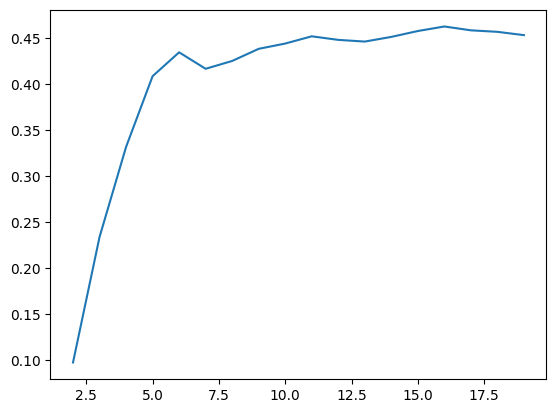

In [ ]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(2,20)],score)

In [ ]:
from sklearn.model_selection import cross_val_score

cv=cross_val_score(knn,diabetes.data,diabetes.target,cv=5,scoring='r2')

TypeError: Cannot clone object '<__main__.KNNRegressor object at 0x7fedcc07d610>' (type <class '__main__.KNNRegressor'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
from sklearn.neighbors   import KNeighborsRegressor

In [ ]:
cv=cross_val_score(KNeighborsRegressor(10),diabetes.data,diabetes.target,cv=5,scoring='r2')

In [ ]:
cv

array([0.34196995, 0.45993106, 0.42671668, 0.42063684, 0.49269841])